In [84]:
var openDigger = require('../src/open_digger');
var query = openDigger.driver.clickhouse.query;

var repo_id = '27193779';
var repo_name = 'nodejs/node';

In [85]:
//起始和终止年份、月份
var start_year = 2015, end_year = 2021;
var start_month = 1, end_month = 12;

var years_amount = end_year - start_year + 1;
var months_per_year = 12;
var months_amount = years_amount * months_per_year;

//构建 year_month 数组
var year_months = Array();
for(let year = start_year; year <= end_year; year++)
{
    for (let month = start_month; month <= end_month; month++)
    {
        year_months.push({'year': year, 'month': month});
    }
}
//坐标图的横坐标
year_month_axis = year_months.map(year_month => year_month['year'].toString() + '-' + year_month['month'].toString())

[
  '2015-1',  '2015-2',  '2015-3',  '2015-4',  '2015-5',
  '2015-6',  '2015-7',  '2015-8',  '2015-9',  '2015-10',
  '2015-11', '2015-12', '2016-1',  '2016-2',  '2016-3',
  '2016-4',  '2016-5',  '2016-6',  '2016-7',  '2016-8',
  '2016-9',  '2016-10', '2016-11', '2016-12', '2017-1',
  '2017-2',  '2017-3',  '2017-4',  '2017-5',  '2017-6',
  '2017-7',  '2017-8',  '2017-9',  '2017-10', '2017-11',
  '2017-12', '2018-1',  '2018-2',  '2018-3',  '2018-4',
  '2018-5',  '2018-6',  '2018-7',  '2018-8',  '2018-9',
  '2018-10', '2018-11', '2018-12', '2019-1',  '2019-2',
  '2019-3',  '2019-4',  '2019-5',  '2019-6',  '2019-7',
  '2019-8',  '2019-9',  '2019-10', '2019-11', '2019-12',
  '2020-1',  '2020-2',  '2020-3',  '2020-4',  '2020-5',
  '2020-6',  '2020-7',  '2020-8',  '2020-9',  '2020-10',
  '2020-11', '2020-12', '2021-1',  '2021-2',  '2021-3',
  '2021-4',  '2021-5',  '2021-6',  '2021-7',  '2021-8',
  '2021-9',  '2021-10', '2021-11', '2021-12'
]

In [86]:
query
(    
    `SHOW DATABASES`
)
.then
(
    res => 
    {    
        console.log(res);
    }
);

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [87]:
query
(    
    `SHOW TABLES from github_log`
)
.then
(
    res => 
    {    
        console.log(res);
    }
)

[ { name: 'events' } ]


In [88]:
//每月star增加的数量
var stars_per_month = [];
stars_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                count(*) as stars
            FROM
                github_log.events
            WHERE
                    repo_id = ${repo_id}
                and type = 'WatchEvent'
                and toYear(created_at) = ${year}
                and toMonth(created_at) = ${month}
            `
        )
        .then
        (
            res =>
            {
                stars_per_month[(year - start_year) * 12 + month - 1] = res[0].stars;
            }
        );
    }
}

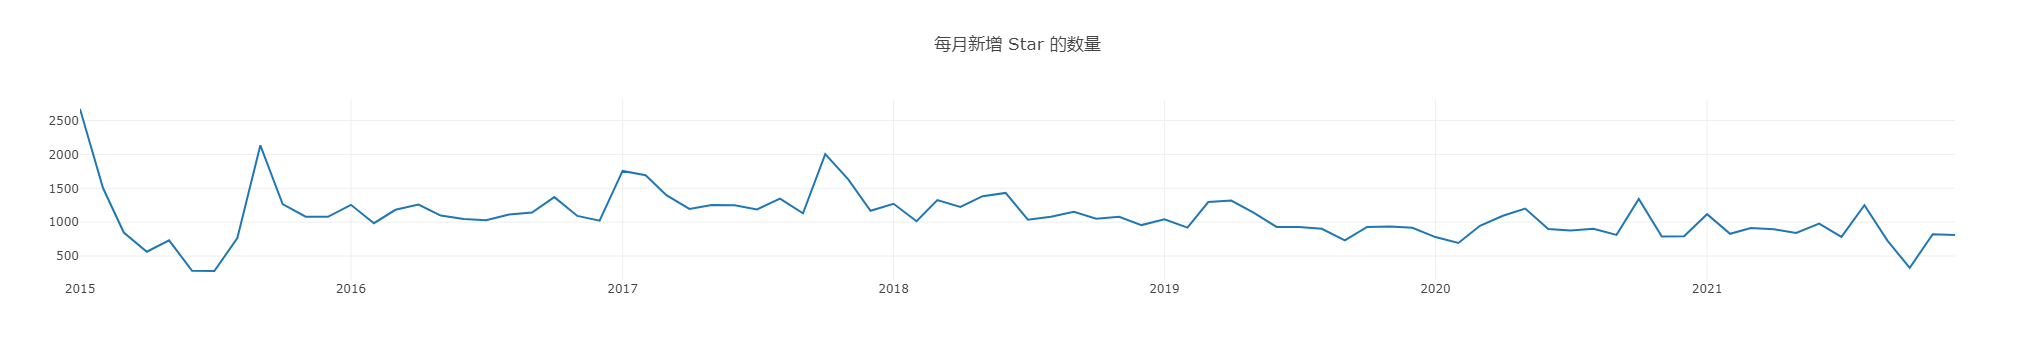

In [89]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: stars_per_month, mode: 'scatter', name: 'star 数量'}
    ],
    {
        title: '每月新增 Star 的数量'
    }
)

In [90]:
//每月fork增加的数量
var forks_per_month = [];
forks_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                count(*) as forks
            FROM
                github_log.events
            WHERE
                    repo_id = ${repo_id}
                and type = 'ForkEvent'
                and toYear(created_at) = ${year}
                and toMonth(created_at) = ${month}
            `
        )
        .then
        (
            res =>
            {
                forks_per_month[(year - start_year) * 12 + month - 1] = res[0].forks;
            }
        );
    }
}

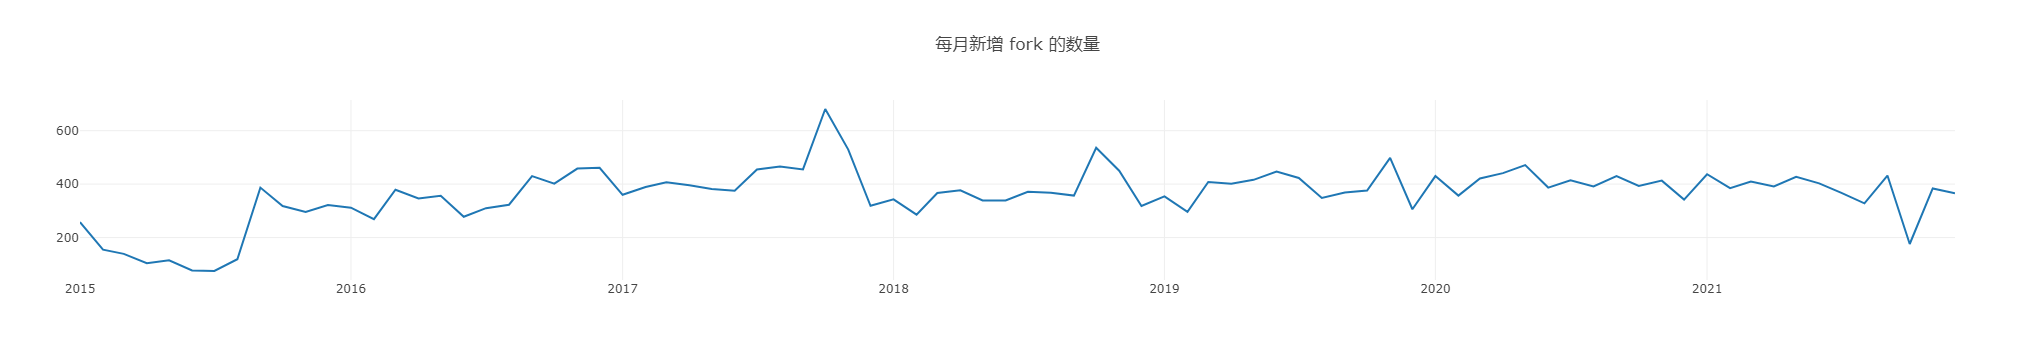

In [91]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: forks_per_month, mode: 'scatter', name: 'fork 数量'}
    ],
    {
        title: '每月新增 fork 的数量'
    }
)

In [92]:
//每月star和fork新增数量表格
var table_stars_forks = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_stars_forks.push(
        {'year_month': year_month_axis[index],
         'stars': stars_per_month[index],
         'forks': forks_per_month[index]}
    );
}

console.table(
    table_stars_forks.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '新增star': data.stars,
                '新增fork': data.forks
            }
        }
    )
)

┌─────────┬───────────┬──────────┬──────────┐
│ (index) │   年-月   │ 新增star │ 新增fork │
├─────────┼───────────┼──────────┼──────────┤
│    0    │ '2015-1'  │  '2671'  │  '258'   │
│    1    │ '2015-2'  │  '1504'  │  '155'   │
│    2    │ '2015-3'  │  '847'   │  '139'   │
│    3    │ '2015-4'  │  '564'   │  '104'   │
│    4    │ '2015-5'  │  '732'   │  '115'   │
│    5    │ '2015-6'  │  '281'   │   '77'   │
│    6    │ '2015-7'  │  '279'   │   '75'   │
│    7    │ '2015-8'  │  '766'   │  '119'   │
│    8    │ '2015-9'  │  '2135'  │  '387'   │
│    9    │ '2015-10' │  '1266'  │  '318'   │
│   10    │ '2015-11' │  '1080'  │  '296'   │
│   11    │ '2015-12' │  '1079'  │  '322'   │
│   12    │ '2016-1'  │  '1256'  │  '312'   │
│   13    │ '2016-2'  │  '985'   │  '269'   │
│   14    │ '2016-3'  │  '1183'  │  '379'   │
│   15    │ '2016-4'  │  '1260'  │  '346'   │
│   16    │ '2016-5'  │  '1097'  │  '356'   │
│   17    │ '2016-6'  │  '1046'  │  '278'   │
│   18    │ '2016-7'  │  '1028'  │  '310

In [93]:
//每月打开issue的数量
var issues_open_per_month = [];
issues_open_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                count(*) as issues_open
            FROM
                github_log.events
            WHERE
                    repo_id = ${repo_id}
                and type = 'IssuesEvent'
                and (action = 'opened' or action = 'reopened')
                and toYear(created_at) = ${year}
                and toMonth(created_at) = ${month}
            `
        )
        .then
        (
            res =>
            {
                issues_open_per_month[(year - start_year) * 12 + month - 1] = res[0].issues_open;
            }
        );
    }
}

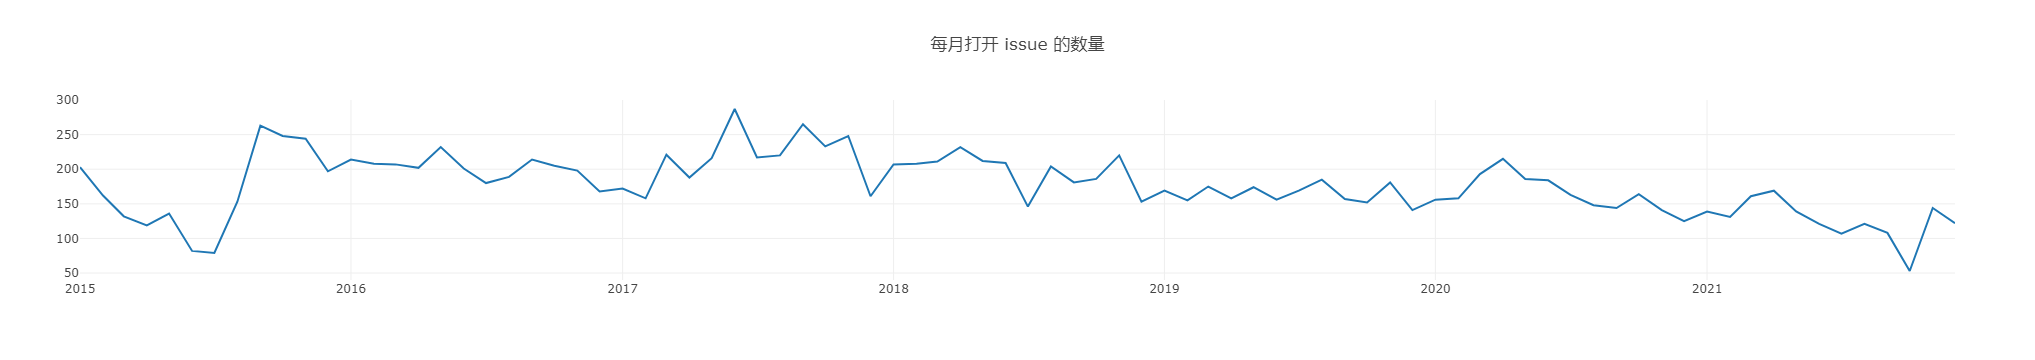

In [94]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: issues_open_per_month, mode: 'scatter', name: 'issue 数量'}
    ],
    {
        title: '每月打开 issue 的数量'
    }
)

In [95]:
//每月关闭issue的数量
var issues_close_per_month = [];
issues_close_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                count(*) as issues_close
            FROM
                github_log.events
            WHERE
                    repo_id = ${repo_id}
                and type = 'IssuesEvent'
                and action = 'closed'
                and toYear(created_at) = ${year}
                and toMonth(created_at) = ${month}
            `
        )
        .then
        (
            res =>
            {
                issues_close_per_month[(year - start_year) * 12 + month - 1] = res[0].issues_close;
            }
        );
    }
}

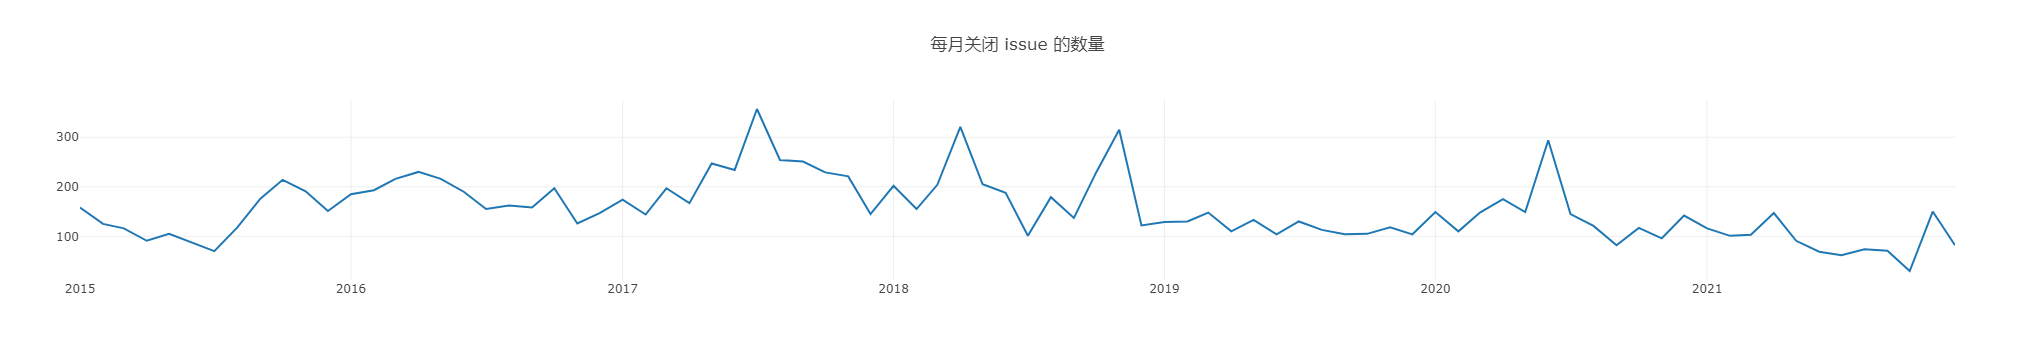

In [96]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: issues_close_per_month, mode: 'scatter', name: 'issue 数量'}
    ],
    {
        title: '每月关闭 issue 的数量'
    }
)

In [97]:
//每月打开、关闭issue数量统计表
var table_issues_open_close = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_issues_open_close.push(
        {'year_month': year_month_axis[index],
         'open': issues_open_per_month[index],
         'close': issues_close_per_month[index]}
    );
}

console.table(
    table_issues_open_close.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '打开issue': data.open,
                '关闭issue': data.close
            }
        }
    )
)

┌─────────┬───────────┬───────────┬───────────┐
│ (index) │   年-月   │ 打开issue │ 关闭issue │
├─────────┼───────────┼───────────┼───────────┤
│    0    │ '2015-1'  │   '203'   │   '158'   │
│    1    │ '2015-2'  │   '162'   │   '125'   │
│    2    │ '2015-3'  │   '132'   │   '116'   │
│    3    │ '2015-4'  │   '119'   │   '91'    │
│    4    │ '2015-5'  │   '136'   │   '105'   │
│    5    │ '2015-6'  │   '82'    │   '88'    │
│    6    │ '2015-7'  │   '79'    │   '70'    │
│    7    │ '2015-8'  │   '153'   │   '118'   │
│    8    │ '2015-9'  │   '263'   │   '176'   │
│    9    │ '2015-10' │   '248'   │   '214'   │
│   10    │ '2015-11' │   '244'   │   '191'   │
│   11    │ '2015-12' │   '197'   │   '151'   │
│   12    │ '2016-1'  │   '214'   │   '185'   │
│   13    │ '2016-2'  │   '208'   │   '193'   │
│   14    │ '2016-3'  │   '207'   │   '216'   │
│   15    │ '2016-4'  │   '202'   │   '230'   │
│   16    │ '2016-5'  │   '232'   │   '216'   │
│   17    │ '2016-6'  │   '201'   │   '190'   

In [98]:
//每月打开 Pull Request 的数量
var pull_request_open_per_month = [];
pull_request_open_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (
            `
            SELECT
                count(*) pull_request_open
            FROM
                github_log.events
            WHERE
                    repo_id = ${repo_id}
                and type = 'PullRequestEvent'
                and action = 'opened'
                and toYear(created_at) = ${year}
                and toMonth(created_at) = ${month}
            `
        )
        .then
        (
            res => 
            {
                pull_request_open_per_month[(year - start_year) * 12 + month - 1] = res[0].pull_request_open;
            }
        );
    }
}

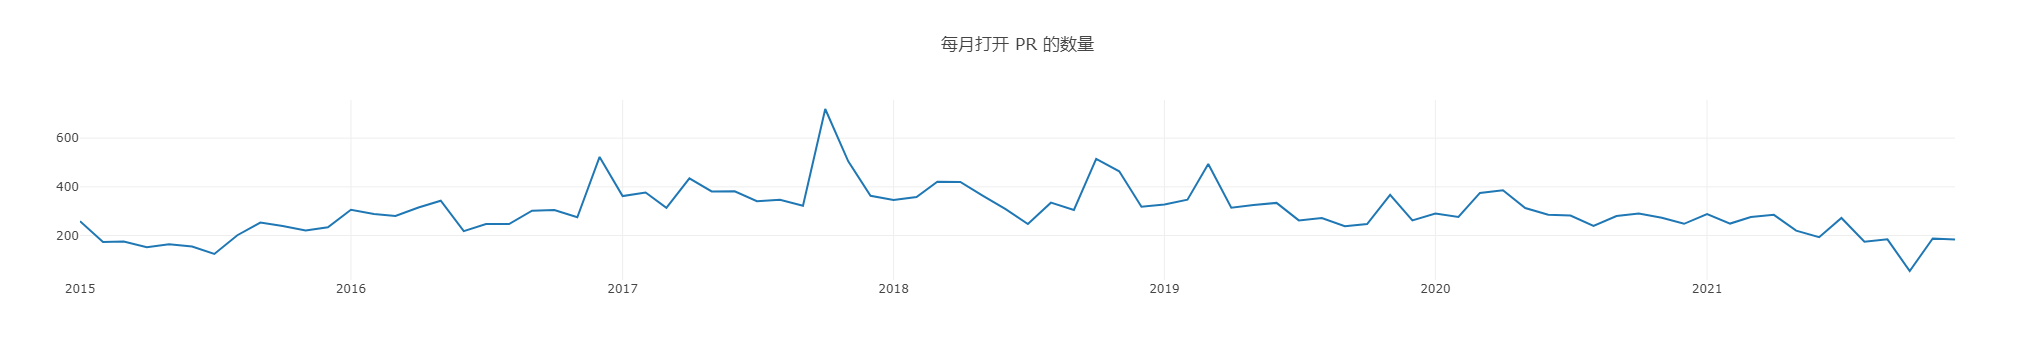

In [99]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: pull_request_open_per_month, mode: 'scatter', name: 'PR 打开数量'}
    ],
    {
        title: '每月打开 PR 的数量'
    }
)

In [100]:
//每月合并 Pull Request 的数量
var pull_request_merged_per_month = [];
pull_request_merged_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (
            `
            SELECT
                count(*) pull_request_merged
            FROM
                github_log.events
            WHERE
                    repo_id = ${repo_id}
                and type = 'PullRequestEvent'
                and action = 'closed'
                and pull_merged_by_id != 0
                and toYear(created_at) = ${year}
                and toMonth(created_at) = ${month}
            `
        )
        .then
        (
            res => 
            {
                pull_request_merged_per_month[(year - start_year) * 12 + month - 1] = res[0].pull_request_merged;
            }
        );
    }
}

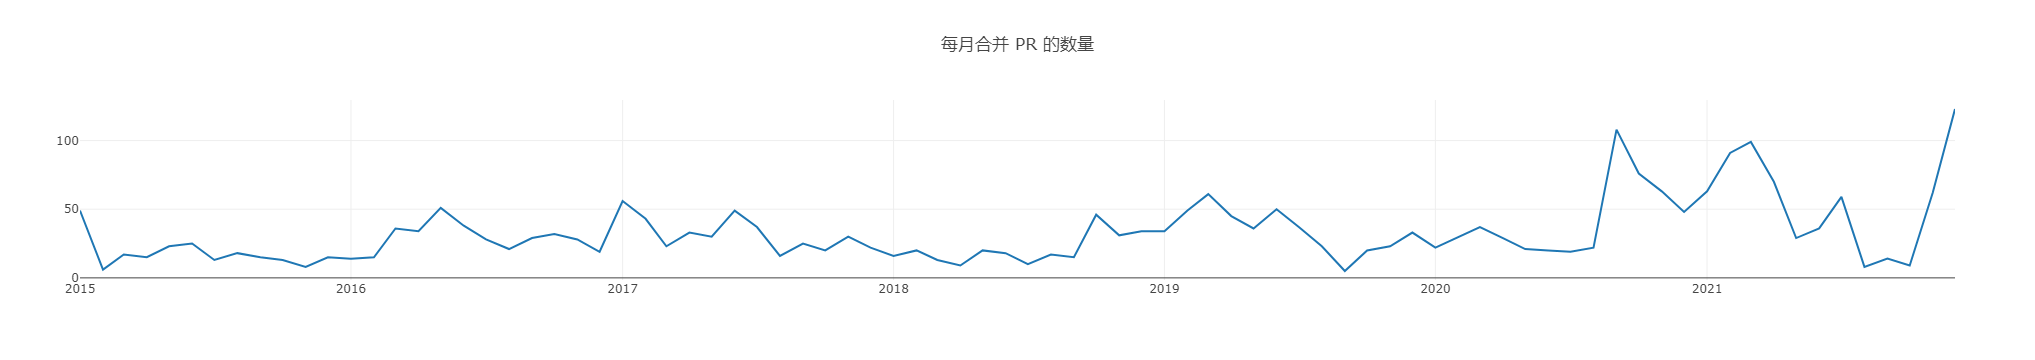

In [101]:
openDigger.render.plotly(
    [
        {x: year_month_axis,
         y: pull_request_merged_per_month,
         mode: 'scatter',
         name: 'PR 合并数量'}
    ],
    {
        title: '每月合并 PR 的数量'
    }
)

In [102]:
//每月打开、合并pull request的数量统计表
var table_prs_open_merge = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_prs_open_merge.push(
        {'year_month': year_month_axis[index],
         'open': pull_request_open_per_month[index],
         'merge': pull_request_merged_per_month[index]}
    );
}

console.table(
    table_prs_open_merge.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '打开Pull Request': data.open,
                '合并Pull Request': data.merge
            }
        }
    )
)

┌─────────┬───────────┬──────────────────┬──────────────────┐
│ (index) │   年-月   │ 打开Pull Request │ 合并Pull Request │
├─────────┼───────────┼──────────────────┼──────────────────┤
│    0    │ '2015-1'  │      '259'       │       '49'       │
│    1    │ '2015-2'  │      '173'       │       '6'        │
│    2    │ '2015-3'  │      '175'       │       '17'       │
│    3    │ '2015-4'  │      '152'       │       '15'       │
│    4    │ '2015-5'  │      '164'       │       '23'       │
│    5    │ '2015-6'  │      '155'       │       '25'       │
│    6    │ '2015-7'  │      '124'       │       '13'       │
│    7    │ '2015-8'  │      '201'       │       '18'       │
│    8    │ '2015-9'  │      '253'       │       '15'       │
│    9    │ '2015-10' │      '239'       │       '13'       │
│   10    │ '2015-11' │      '221'       │       '8'        │
│   11    │ '2015-12' │      '234'       │       '15'       │
│   12    │ '2016-1'  │      '306'       │       '14'       │
│   13    │ '2

In [103]:
//每月在仓库中活跃的不同开发者数量
var active_developer_per_month = [];
active_developer_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (
            `
            SELECT
                COUNT(DISTINCT actor_id) as active_developer_num
            FROM 
                github_log.events
            WHERE 
                    repo_id = ${repo_id}
                and toYear(created_at) = ${year}
                and toMonth(created_at) = ${month}
            `
        )
        .then
        (
            res => 
            {
                active_developer_per_month[(year - start_year) * 12 + month - 1] = res[0].active_developer_num;
            }
        );
    }
}

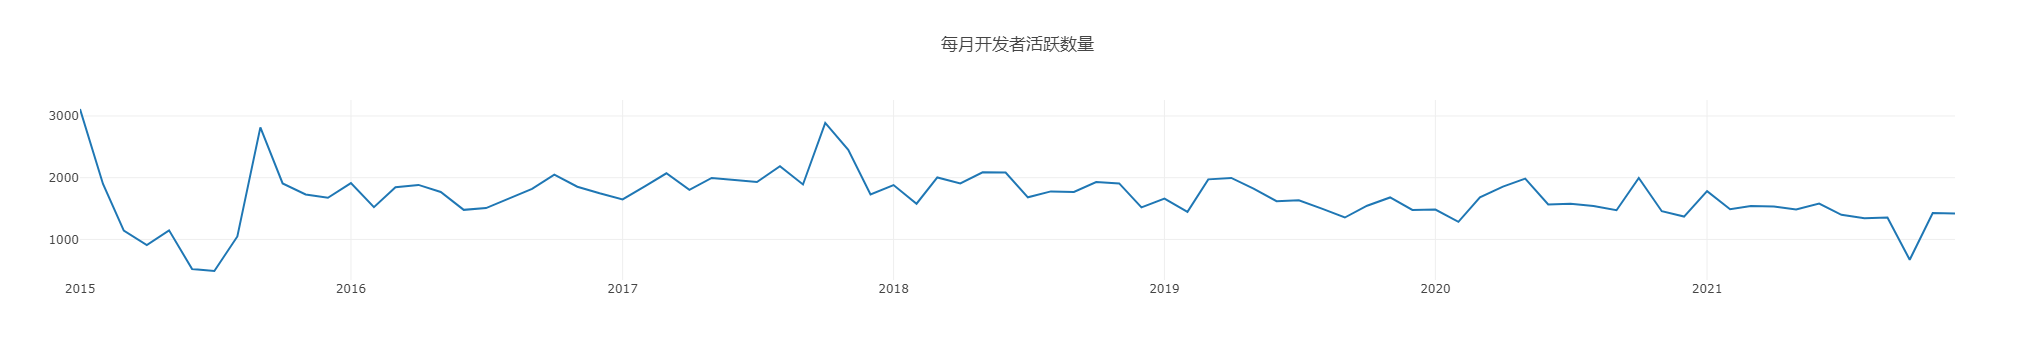

In [104]:
openDigger.render.plotly(
    [
        {x: year_month_axis,
         y: active_developer_per_month,
         mode: 'scatter',
         name: '开发者活跃数量'}
    ],
    {
        title: '每月开发者活跃数量'
    }
)

In [105]:
//每月活跃用户的统计表
var table_active_developer = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_active_developer.push(
        {'year_month': year_month_axis[index],
         'active_developer': active_developer_per_month[index]}
    );
}

console.table(
    table_active_developer.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '活跃人数': data.active_developer
            }
        }
    )
)

┌─────────┬───────────┬──────────┐
│ (index) │   年-月   │ 活跃人数 │
├─────────┼───────────┼──────────┤
│    0    │ '2015-1'  │  '3112'  │
│    1    │ '2015-2'  │  '1898'  │
│    2    │ '2015-3'  │  '1143'  │
│    3    │ '2015-4'  │  '907'   │
│    4    │ '2015-5'  │  '1148'  │
│    5    │ '2015-6'  │  '521'   │
│    6    │ '2015-7'  │  '489'   │
│    7    │ '2015-8'  │  '1048'  │
│    8    │ '2015-9'  │  '2814'  │
│    9    │ '2015-10' │  '1906'  │
│   10    │ '2015-11' │  '1728'  │
│   11    │ '2015-12' │  '1674'  │
│   12    │ '2016-1'  │  '1912'  │
│   13    │ '2016-2'  │  '1522'  │
│   14    │ '2016-3'  │  '1846'  │
│   15    │ '2016-4'  │  '1883'  │
│   16    │ '2016-5'  │  '1768'  │
│   17    │ '2016-6'  │  '1479'  │
│   18    │ '2016-7'  │  '1508'  │
│   19    │ '2016-8'  │  '1667'  │
│   20    │ '2016-9'  │  '1819'  │
│   21    │ '2016-10' │  '2049'  │
│   22    │ '2016-11' │  '1854'  │
│   23    │ '2016-12' │  '1747'  │
│   24    │ '2017-1'  │  '1649'  │
│   25    │ '2017-2'  │  '

In [106]:
//issue从打开到关闭的平均时长和中位数时长（单位：天）
query
(
    `
    SELECT
        AVG(opened_time) as avg_opened_time,
        quantile(0.5)(opened_time) as medium_opened_time
    FROM 
        (
        SELECT repo_id, type, action, (toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at)) as opened_time FROM github_log.events
        )
    WHERE 
            repo_id = ${repo_id}
        and type = 'IssuesEvent'
        and action = 'closed'
    `
)
.then
(
    res => 
    {
        console.log(res);
    }
);

[ { avg_opened_time: 97.12852203339955, medium_opened_time: 5 } ]


In [107]:
//PR从打开到合并的平均时长和中位数时长（单位：天）
query
(
    `
    SELECT
        AVG(opened_time) as avg_opened_time,
        quantile(0.5)(opened_time) as medium_opened_time
    FROM
        (
            SELECT
                toRelativeDayNum(max(created_at)) - toRelativeDayNum(min(created_at)) as opened_time
            FROM 
                (
                SELECT repo_id, type, created_at, issue_id FROM github_log.events
                )
            WHERE 
                    repo_id = ${repo_id}
                and type = 'PullRequestEvent'
            GROUP BY 
                issue_id
            HAVING
                COUNT(*) = 2
        )
    `
)
.then
(
    res => 
    {
        console.log(res);
    }
);

[ { avg_opened_time: 19.194545601683256, medium_opened_time: 3 } ]


In [108]:
//issue和PR从打开第一次有人回复（非本人回复）的平均时长和中位数时长（单位：天）
query
(
    `
    SELECT
        AVG(time) as avg_time,
        quantile(0.5)(time) as medium_time,
        COUNT(*) count
    FROM
        ((
            SELECT
                issue_id,
                MIN(toRelativeDayNum(issue_comment_created_at) - toRelativeDayNum(issue_created_at)) as time
            FROM 
                (
                SELECT repo_id, type, action, issue_id, issue_created_at, issue_comment_created_at, issue_comment_author_id, issue_author_id FROM github_log.events
                )
            WHERE 
                    repo_id = ${repo_id}
                and type = 'IssueCommentEvent'
                and action = 'created'
                and issue_comment_author_id != issue_author_id
            GROUP BY
                issue_id
        )
        UNION ALL
        (
            SELECT
                issue_id,
                MIN(toRelativeDayNum(created_at) - toRelativeDayNum(issue_created_at)) as time
            FROM 
                (
                SELECT repo_id, type, action, issue_id, issue_created_at, created_at, issue_author_login, pull_requested_reviewer_login FROM github_log.events
                )
            WHERE 
                    repo_id = ${repo_id}
                and type = 'PullRequestReviewEvent'
                and action = 'created'
                and issue_author_login != pull_requested_reviewer_login
            GROUP BY
                issue_id
        ))
    `
)
.then
(
    res => 
    {
        console.log(res);
    }
);

[ { avg_time: 5.695111180382377, medium_time: 0, count: '38496' } ]
